In [21]:
# Import some stuff for graphical display
import re  # To hack labels into the SVG
from IPython.display import display, SVG

# Install the latest versions of the tools below using
#  python3 -m pip install git+https://github.com/tskit-dev/tskit#subdirectory=python
#  python3 -m pip install git+https://github.com/tskit-dev/msprime
#  python3 -m pip install git+https://github.com/tskit-dev/tsinfer

import tskit    # the tree sequence toolkit. Is normally imported automatically
import msprime  # a fast coalescent simulator that produces tree sequences
import tsinfer  # to infer tree sequences from real or simulated genomes

In [22]:
# Create a tiny tree sequence for illustration
tree_sequence = msprime.simulate(sample_size=8, length=1000, recombination_rate=0.001, random_seed=18453)

print(
    tree_sequence.num_trees,
    "trees in this tree sequence,",
    "at genomic positions:")
for tree in tree_sequence.trees():
    print(f" tree {tree.index}: {tree.interval[0]:.2f} to {tree.interval[1]:.2f}")

4 trees in this tree sequence, at genomic positions:
 tree 0: 0.00 to 361.51
 tree 1: 361.51 to 788.55
 tree 2: 788.55 to 873.01
 tree 3: 873.01 to 1000.00


Internally, trees are stored as a table of nodes and a table of edges. The only vital columns in the node table are `id` and `time` (which determines the tree branch lengths).

In [30]:
tree_sequence.tables.nodes

id,flags,population,individual,time,metadata
0,1,0,-1,0.00000000000000,
1,1,0,-1,0.00000000000000,
2,1,0,-1,0.00000000000000,
3,1,0,-1,0.00000000000000,
4,1,0,-1,0.00000000000000,
5,1,0,-1,0.00000000000000,
6,1,0,-1,0.00000000000000,
7,1,0,-1,0.00000000000000,
8,0,0,-1,0.06390764397957,
9,0,0,-1,0.10154085014332,


In [31]:
tree_sequence.tables.edges

id,left,right,parent,child,metadata
0,0.00000000,1000.00000000,8,2,
1,0.00000000,1000.00000000,8,6,
2,0.00000000,1000.00000000,9,7,
3,0.00000000,1000.00000000,9,8,
4,0.00000000,1000.00000000,10,3,
5,0.00000000,1000.00000000,10,4,
6,0.00000000,1000.00000000,11,0,
7,0.00000000,1000.00000000,11,9,
8,0.00000000,1000.00000000,12,1,
9,0.00000000,1000.00000000,12,10,


## Iterating over trees
The standard way of iterating over trees is to use [`tree_sequence.trees()`](https://tskit.readthedocs.io/en/latest/python-api.html#tskit.TreeSequence.trees), as in the next example. There is, however, another iterator which might be more relevant to the SPR: [`tree_sequence.edge_diffs()`](https://tskit.readthedocs.io/en/latest/python-api.html#tskit.TreeSequence.edge_diffs). This gives a list of edges that are deleted and another list of edges that are inserted as you move from one tree to the next.

In [37]:
# A basic way of drawing the trees is to use the text format:
for tree in tree_sequence.trees():
    print(tree.draw_text(), "== Tree", tree.index, "==\n\n")

      17       
  ┏━━━━┻━━━━┓  
  ┃        15  
  ┃       ┏━┻━┓
  ┃      12   ┃
  ┃     ┏━┻┓  ┃
 11     ┃  ┃  ┃
┏━┻━┓   ┃  ┃  ┃
┃   ┃   ┃ 10  ┃
┃   ┃   ┃ ┏┻┓ ┃
┃   9   ┃ ┃ ┃ ┃
┃  ┏┻━┓ ┃ ┃ ┃ ┃
┃  8  ┃ ┃ ┃ ┃ ┃
┃ ┏┻┓ ┃ ┃ ┃ ┃ ┃
0 2 6 7 1 3 4 5
 === Tree 0 ===


      16       
  ┏━━━━┻━━━━┓  
  ┃        15  
  ┃       ┏━┻━┓
  ┃      12   ┃
  ┃     ┏━┻┓  ┃
 11     ┃  ┃  ┃
┏━┻━┓   ┃  ┃  ┃
┃   ┃   ┃ 10  ┃
┃   ┃   ┃ ┏┻┓ ┃
┃   9   ┃ ┃ ┃ ┃
┃  ┏┻━┓ ┃ ┃ ┃ ┃
┃  8  ┃ ┃ ┃ ┃ ┃
┃ ┏┻┓ ┃ ┃ ┃ ┃ ┃
0 2 6 7 1 3 4 5
 === Tree 1 ===


       15      
     ┏━━┻━━━┓  
    13      ┃  
  ┏━━┻━━┓   ┃  
  ┃     ┃  12  
  ┃     ┃ ┏━┻┓ 
 11     ┃ ┃  ┃ 
┏━┻━┓   ┃ ┃  ┃ 
┃   ┃   ┃ ┃ 10 
┃   ┃   ┃ ┃ ┏┻┓
┃   9   ┃ ┃ ┃ ┃
┃  ┏┻━┓ ┃ ┃ ┃ ┃
┃  8  ┃ ┃ ┃ ┃ ┃
┃ ┏┻┓ ┃ ┃ ┃ ┃ ┃
0 2 6 7 5 1 3 4
 === Tree 2 ===


      15       
  ┏━━━━┻━━━━┓  
  ┃        14  
  ┃       ┏━┻━┓
  ┃      12   ┃
  ┃     ┏━┻┓  ┃
 11     ┃  ┃  ┃
┏━┻━┓   ┃  ┃  ┃
┃   ┃   ┃ 10  ┃
┃   ┃   ┃ ┏┻┓ ┃
┃   9   ┃ ┃ ┃ ┃
┃  ┏┻━┓ ┃ ┃ ┃ ┃
┃  8  ┃ ┃ ┃ ┃ ┃
┃ ┏┻┓ ┃ ┃ ┃ ┃ ┃
0 

In [52]:
print("Edges out and in. Note that the first tree has all edges coming in\n")
for interval, edges_out, edges_in in tree_sequence.edge_diffs():
    print(f"===== {interval} =====")
    print("OUT:", "\n     ".join(str(e) for e in edges_out))
    print("IN:", "\n    ".join(str(e) for e in edges_in))
    print("\n")

Edges out and in. Note that the first tree has all edges coming in

===== (0.0, 361.5051871165633) =====
OUT: 
IN: {left=0.000, right=1000.000, parent=8, child=2, id=0, metadata=b''}
    {left=0.000, right=1000.000, parent=8, child=6, id=1, metadata=b''}
    {left=0.000, right=1000.000, parent=9, child=7, id=2, metadata=b''}
    {left=0.000, right=1000.000, parent=9, child=8, id=3, metadata=b''}
    {left=0.000, right=1000.000, parent=10, child=3, id=4, metadata=b''}
    {left=0.000, right=1000.000, parent=10, child=4, id=5, metadata=b''}
    {left=0.000, right=1000.000, parent=11, child=0, id=6, metadata=b''}
    {left=0.000, right=1000.000, parent=11, child=9, id=7, metadata=b''}
    {left=0.000, right=1000.000, parent=12, child=1, id=8, metadata=b''}
    {left=0.000, right=1000.000, parent=12, child=10, id=9, metadata=b''}
    {left=0.000, right=788.552, parent=15, child=5, id=14, metadata=b''}
    {left=0.000, right=873.009, parent=15, child=12, id=16, metadata=b''}
    {left=0.000

## Prettier tree plotting, overlaying edge changes
Since we are simulating in continuous genomic coordinates, each recombination happens at a unique position, so each tree change corresponds to one SPR. However, the number of replaced edges corresponding to a single SPR can be 2, 3, or (most commonly) 4. SPRs that change the age of the root (but not the topology) result in 2 replaced edges. SPRs that do not change the topology but simply prune and regraft back onto the same internal branch lead to 3 replaced edges. SPRs that change the internal topology lead to 4 replaced edges. 

We can use the `plot_svg()` method to get a nicer viz of a tree sequence, and the `edge_diffs()` iterator to obtain and label the edge changes from tree-to-tree.

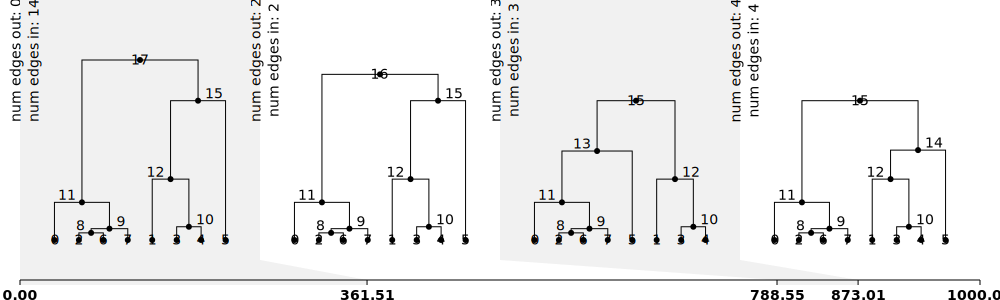

In [53]:
svg_text = tree_sequence.draw_svg(size=(1000, 300))
labels = []
for interval, edges_out, edges_in in tree_sequence.edge_diffs():
    labels.append(
        '<text transform="rotate(-90)"><tspan x="-30" y="-4">' + 
        'num edges out: '+str(len(edges_out)) +
        '</tspan><tspan x="-30" y="1em">' +
        'num edges in: '+str(len(edges_in)) +
        '</tspan></text>')

# A bit of a hack here, which relies on knowledge of the drawing format
svg_text = re.sub(
    r'<g class="tree t(\d).*?>',
    lambda m: m.group(0) + labels[int(m.group(1))],
    svg_text)

# Plot to the screen
SVG(svg_text)

## List the actual edges in and out
For looking at the correspondance between edge changes and SPRs, it is helpful to list the actual edges (parent->child). Using the SVG format we can also colour the edges which will be removed or added

In [54]:
# Add some labels listing the edges out and in
def make_edge_labels(ts):
    out_labels = []
    in_labels = []
    out_edges = []
    in_edges = []

    for tree_id, (interval, edges_out, edges_in) in enumerate(ts.edge_diffs()):
        out_edges.append(edges_out)
        out_labels.append(
            '<text fill="red"><tspan x="-25" y="0" font-size="0.7em">Edges out</tspan>'
            + "".join('<tspan x="-25" y="{}.2em">{}▸{}</tspan>'.format(
                i+1, e.parent, e.child) for i, e in enumerate(edges_out))
            + '</text>')

        in_edges.append(edges_in)
        in_labels.append(
            f'<text class="edges-in{tree_id}" fill="blue"><tspan x="25" y="0" font-size="0.7em">Edges in</tspan>'
            + "".join(f'<tspan x="25" y="{i+1}.2em">{e.parent}▸{e.child}</tspan>' for i, e in enumerate(edges_in))
            + '</text>')
    return out_labels, in_labels, out_edges, in_edges

out_labels, in_labels, out_edges, in_edges = make_edge_labels(tree_sequence)

def add_edge_labels(original_svg, out_labels, in_labels):
    "A bespoke hack to put labels in the right place"
    return re.sub(
        r'<g class="tree t(\d).*?>',
        lambda m: m.group(0) + out_labels[int(m.group(1))] + in_labels[int(m.group(1))],
        original_svg)

Edges-out coloured in red


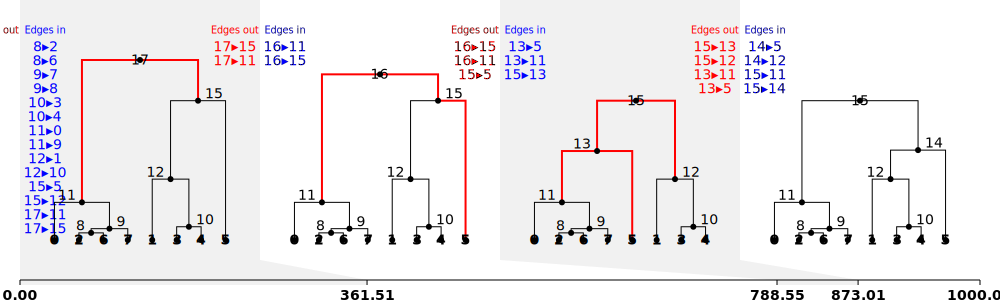

In [55]:
print("Edges-out coloured in red")
plot_id = "plot2"  # Useful for targetting the stylesheet
# Plot the sample nodes in bold
base_style = ".node.sample > text {font-weight: bold}"
style = base_style + " ".join([
    ("#%s .tree.t%i .node.n%i > .edge {stroke: red; stroke-width: 2px}" % (plot_id, t-1, e.child))
        for t, edges in enumerate(out_edges) for e in edges])

svg_text = add_edge_labels(
    tree_sequence.draw_svg(
        size=(1000, 300),
        style=style,
        root_svg_attributes={'id': plot_id}),
    out_labels,
    in_labels) 

# Plot to the screen
SVG(svg_text)

Edges-in coloured blue


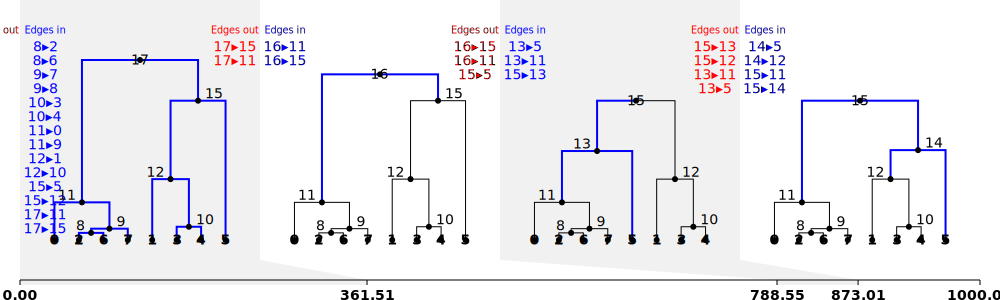

In [56]:
print("Edges-in coloured blue")

plot_id = "plot3"  # Useful for targetting the stylesheet
style = base_style + " ".join([
    ("#%s .tree.t%i .node.n%i > .edge {stroke: blue; stroke-width: 2px}" % (plot_id, t, e.child))
        for t, edges in enumerate(in_edges) for e in edges])

svg_text = add_edge_labels(
    tree_sequence.draw_svg(
        size=(1000, 300),
        style=style,
        root_svg_attributes={'id': plot_id}),
    out_labels,
    in_labels) 

# Plot to the screen
SVG(svg_text)

In [57]:
# Add some mutations
ts_with_mutations = msprime.mutate(tree_sequence, rate=0.01, random_seed=12345678)
samples = set(ts_with_mutations.samples())
print("Added {} mutations ({} singletons)".format(
    ts_with_mutations.num_mutations,
    len([m for m in ts_with_mutations.mutations() if m.node in samples])))

Added 43 mutations (24 singletons)


In [58]:
# Infer the trees from the mutational data. Note that we will not be able to infer that
# the first two trees are different, since they both have have the same topology:
variant_data_file = tsinfer.SampleData.from_tree_sequence(ts_with_mutations)
inferred_ts = tsinfer.infer(variant_data_file)  # this will be fast even for thousands of tips & mutations
# By default we leave unary nodes in the inferred ts, for better compression, but
#  this makes it less obvious what's going on, so we can remove themn using `simplify()`
inferred_ts = inferred_ts.simplify()
print(
    inferred_ts.num_trees,
    "trees in the inferred tree sequence,",
    "at genomic positions:")
for tree in inferred_ts.trees():
    print(f" tree {tree.index}: {tree.interval[0]:.2f} to {tree.interval[1]:.2f}")
print("Normalised Kendall-Colijn difference between simulated and inferred tree seqs is:")
print('>>>', tree_sequence.kc_distance(inferred_ts))

3 trees in the inferred tree sequence, at genomic positions:
 tree 0: 0.00 to 812.22
 tree 1: 812.22 to 928.98
 tree 2: 928.98 to 1000.00
Normalised Kendall-Colijn difference between simulated and inferred tree seqs is:
>>> 1.2403068094191225


## Plot the inferred tree sequence
Note that the terminal nodes will have the same labels, but the internal node labels will be different

Inferred tree sequence: internal node numbers (non-bold) may differ from the simulated ts


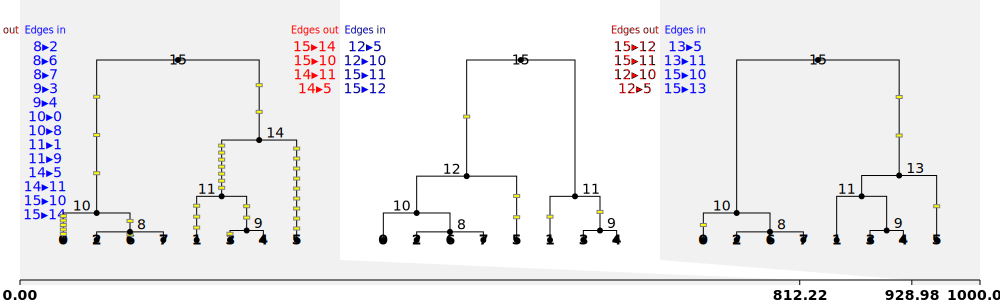

In [59]:
print("Inferred tree sequence: internal node numbers (non-bold) may differ from the simulated ts")

out_labels_inf, in_labels_inf, out_edges_inf, in_edges_inf = make_edge_labels(inferred_ts)

plot_id = "plot4"  # Useful for targetting the stylesheet
# Mutations are usually labelled red squares. Here we hide the mutation labels
# and make the symbols yellow, so as not to conflict with the edge colours
style = base_style + ".mut > text {display: none}  .mut > rect {fill: yellow; stroke: grey; height: 3px}"
svg_text = add_edge_labels(
    inferred_ts.draw_svg(
        size=(1000, 300),
        style=style,
        root_svg_attributes={'id': plot_id}),
    out_labels_inf,
    in_labels_inf) 

# Plot to the screen
SVG(svg_text)

## Plot a comparison between the original and inferred tree sequences
In this case we have quite an easy situation, where each tree change is caused by 4 edge changes

In [60]:
plot_id1 = "plot5a"
plot_id2 = "plot5b"
style = style + ".edges-in0 {display: none}"  # Hide the list of initial edges coming in
style2=style + """
         #%s .background {transform: translate(0, 300px) scale(1, -1)}
         #%s .axis {transform: scale(1, -1) translate(0, -302px)}
         #%s .axis text {transform: scale(1, -1) translate(0, 10px)}
      """ % (plot_id2, plot_id2, plot_id2)
svg_text1 = add_edge_labels(
    ts_with_mutations.draw_svg(
        size=(1000, 300),
        style=style,
        root_svg_attributes={'id': plot_id1}),
    out_labels,
    in_labels) 

svg_text2 = add_edge_labels(
    inferred_ts.draw_svg(
        size=(1000, 300),
        style=style2,
        root_svg_attributes={'id': plot_id2, 'y': "300"}),
    out_labels_inf,
    in_labels_inf) 


# Plot to the screen
print("Original tree sequence with true SPRs")
display(SVG('<svg height="600px">' + svg_text1 + svg_text2 + '</svg>'))
print("Inferred tree sequence with edge changes which may not correspond to SPRs")

Original tree sequence with true SPRs


Inferred tree sequence with edge changes which may not correspond to SPRs


# A more complex example
In most cases, the number of edge replacements for a tree are not so uniform, ant it may even be possible to have different numbers of edges in and edges out, if a tree change creates or removes a polytomy. Here's a larger, more complex example:

In [61]:
ts = msprime.simulate(10, length=1000, recombination_rate=0.01, mutation_rate=0.01, random_seed=12345)
inferred_ts = tsinfer.infer(tsinfer.SampleData.from_tree_sequence(ts, use_times=False)).simplify()
print(f"Simulated ts has {ts.num_trees} trees, inferred ts has {inferred_ts.num_trees} trees.")
print("Edges in:out from the simulated (ideal) tree seq")
print(" ".join(f"{len(e_out)}:{len(e_in)}" for _, e_out, e_in in ts.edge_diffs()))
print("Edges in:out from the inferred tree seq")
print(" ".join(f"{len(e_out)}:{len(e_in)}" for _, e_out, e_in in inferred_ts.edge_diffs()))

Simulated ts has 87 trees, inferred ts has 25 trees.
Edges in:out from the simulated (ideal) tree seq
0:18 3:3 4:4 3:3 3:3 3:3 3:3 4:4 3:3 4:4 3:3 3:3 3:3 4:4 3:3 4:4 2:2 4:4 3:3 4:4 3:3 4:4 4:4 4:4 4:4 4:4 3:3 2:2 4:4 3:3 4:4 2:2 3:3 3:3 2:2 2:2 2:2 2:2 4:4 3:3 2:2 2:2 2:2 4:4 4:4 2:2 4:4 4:4 3:3 2:2 3:3 4:4 3:3 3:3 4:4 4:4 4:4 3:3 4:4 4:4 2:2 4:4 4:4 3:3 4:4 4:4 4:4 3:3 4:4 3:3 4:4 4:4 3:3 2:2 4:4 2:2 2:2 4:4 2:2 4:4 4:4 4:4 2:2 4:4 2:2 4:4 3:3
Edges in:out from the inferred tree seq
0:18 3:2 1:1 5:4 5:6 4:4 3:3 3:3 3:3 4:4 6:6 4:4 8:8 4:4 3:3 5:6 3:3 3:2 8:8 3:2 8:7 4:4 2:2 7:7 3:3


In [62]:
# Show genomic locations of the inferred trees
print("Edges in:out (+pos) from the inferred tree seq")
print(", ".join(f"{len(e_out)}:{len(e_in)} ({i[0]:0.3f})" for i, e_out, e_in in inferred_ts.edge_diffs()))

Edges in:out (+pos) from the inferred tree seq
0:18 (0.000), 3:2 (118.279), 1:1 (151.258), 5:4 (159.036), 5:6 (172.657), 4:4 (176.645), 3:3 (237.490), 3:3 (280.891), 3:3 (435.053), 4:4 (447.276), 6:6 (458.893), 4:4 (518.700), 8:8 (527.907), 4:4 (580.286), 3:3 (593.243), 5:6 (625.574), 3:3 (628.242), 3:2 (639.753), 8:8 (668.633), 3:2 (698.673), 8:7 (756.730), 4:4 (763.374), 2:2 (775.304), 7:7 (843.647), 3:3 (935.766)


In [63]:
# Trim the tree sequences down to a particular set of unusual tree transitions
ts = ts.keep_intervals([[670, 790]]).trim()
inferred_ts = inferred_ts.keep_intervals([[670, 790]]).trim()



Original tree sequence with true SPRs


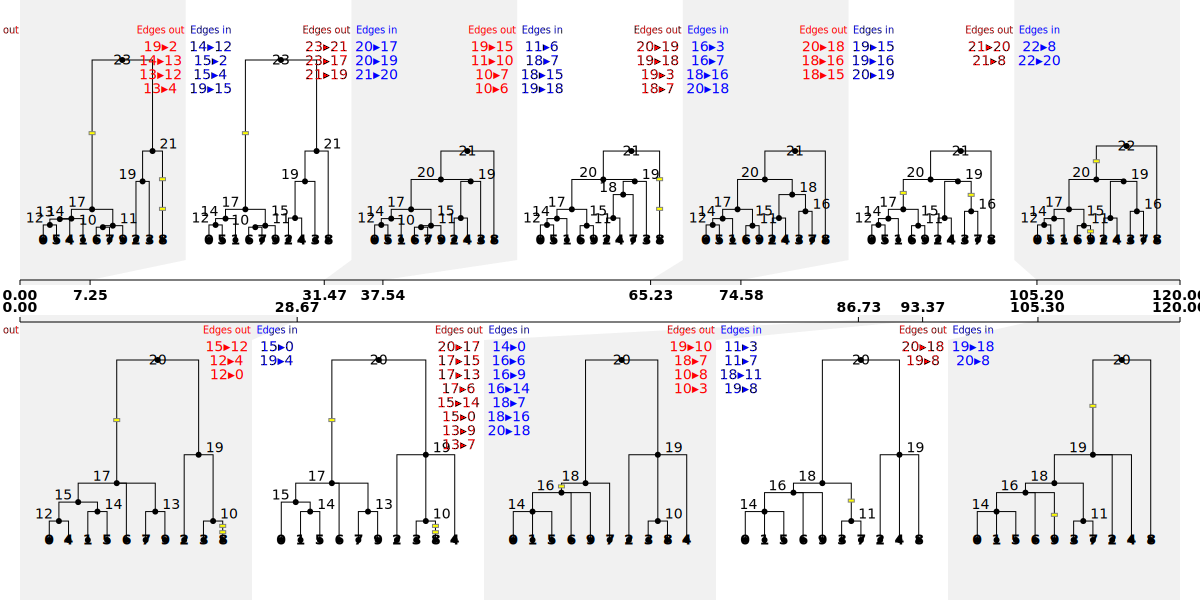

Inferred tree sequence with edge changes which may not correspond to SPRs


In [64]:
plot_id1 = "plot6a"
plot_id2 = "plot6b"

out_labels, in_labels, out_edges, in_edges = make_edge_labels(ts)
out_labels_inf, in_labels_inf, out_edges_inf, in_edges_inf = make_edge_labels(inferred_ts)

style2=style + """
         #%s .background {transform: translate(0, 300px) scale(1, -1)}
         #%s .axis {transform: scale(1, -1) translate(0, -302px)}
         #%s .axis text {transform: scale(1, -1) translate(0, 10px)}
      """ % (plot_id2, plot_id2, plot_id2)
svg_text1 = add_edge_labels(
    ts.draw_svg(
        size=(1200, 300),
        style=style,
        root_svg_attributes={'id': plot_id1}),
    out_labels,
    in_labels) 

svg_text2 = add_edge_labels(
    inferred_ts.draw_svg(
        size=(1200, 300),
        style=style2,
        root_svg_attributes={'id': plot_id2, 'y': "300"}),
    out_labels_inf,
    in_labels_inf) 


# Plot to the screen
print("Original tree sequence with true SPRs")
display(SVG('<svg height="600px" width="1200">' + svg_text1 + svg_text2 + '</svg>'))
print("Inferred tree sequence with edge changes which may not correspond to SPRs")